# Cómo animar

Para poder hacer animaciones, necesitamos primero instalar [FFmpeg](https://en.wikipedia.org/wiki/FFmpeg).

En **Ubuntu** la instalación se hace con:

```
sudo apt-add-repository ppa:mc3man/trusty-media

sudo apt-get update

sudo apt-get install ffmpeg gstreamer0.10-ffmpeg
```

En **Mac**, lo más fácil es seguir las instrucción [aquí](http://www.renevolution.com/how-to-install-ffmpeg-on-mac-os-x/). (Se utiliza `homebrew` así que el primer paso es conseguirlo.)

La idea es generar nuestras imágenes como de lo haríamos normalmente, con `PyPlot`, y luego usar `matplotlib.animation` para "pegarlas" y hacer la animación. 

Vamos a usar esta biblioteca directamente en `Python`, así que hay que llamarla con `PyCall` y usar la notación `objeto[:atributo]` para acceder a los atributos (normalmente se haría con `objeto.atributo`).

In [2]:
using PyPlot
using PyCall
@pyimport matplotlib.animation as anim  

`FFmpeg` necesita montones de comandos incomprensibles así que definimos un par de funciones con los que ya no te tienes que preocupar de como se usa.

`anima()` recibe los estados que se van a animar, y el nombre de la animación (por favor! sin acentos ni eñes!). En este ejemplo se utiliza imshow para cada gráfica, por lo que cada estado es una matriz. Aquí es donde te puedes poner creativo para animar distintas cosas.

`muestra_animacion()` recibe el nombre que utilizaste, y carga la animación dentro del notebook.

In [3]:
function anima(edos, nombre::ASCIIString)
    fig = figure(figsize=(5,5))
    cuadros = [[imshow(edos[i], interpolation="none")] for i=1:length(edos)]
    
    animacion = anim.ArtistAnimation(fig, cuadros, interval=200, blit=true) 
    animacion[:save](nombre*".mp4", extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
end

function muestra_animacion(nombre::ASCIIString)
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",base64(open(readbytes,nombre*".mp4")),"""" type="video/mp4"></video>"""))
end

muestra_animacion (generic function with 1 method)

### Generamos los datos que vamos a animar

Se trata de la probabilidad con la que se mueve un caminante aleatorio en 2D. El método con el que se encuentra la probabilidad en cada tiempo se llama **enumeración exacta**.

In [4]:
#Voy a crear una matriz grandota donde la primer entrada es el tiempo, ustede háganlo más eficiente sin usar tanta memoria
Lx=20 #Posiciones en x
Ly=20 #Posiciones en y
N=20 #Tiempos
P=zeros(N,Lx,Ly)
P[1,Lx/2,Ly/2]=1 #Empezamos en la casilla (1,1)

for i in 2:N #Loop tiempo
    for j in 1:Lx #Loop en x
        for k in 1:Ly #Loop en y
            if j==1
                if k==1
                    P[i,j,k]=1/4*(P[i-1,j+1,k]+P[i-1,j,k+1])
                elseif k==Ly
                    P[i,j,k]=1/4*(P[i-1,j,k-1]+P[i-1,j+1,k])
                else
                    P[i,j,k]=1/4*(P[i-1,j,k-1]+P[i-1,j+1,k]+P[i-1,j,k+1])
                end
            elseif j==Lx
                if k==1
                    P[i,j,k]=1/4*(P[i-1,j-1,k]+P[i-1,j,k+1])
                elseif k==Ly
                    P[i,j,k]=1/4*(P[i-1,j,k-1]+P[i-1,j-1,k])
                else
                    P[i,j,k]=1/4*(P[i-1,j,k-1]+P[i-1,j-1,k]+P[i-1,j,k+1])
                end
            else
                if k==1
                    P[i,j,k]=1/4*(P[i-1,j-1,k]+P[i-1,j+1,k]+P[i-1,j,k+1])
                elseif k==Ly
                    P[i,j,k]=1/4*(P[i-1,j-1,k]+P[i-1,j,k-1]+P[i-1,j+1,k])
                else
                    P[i,j,k]=1/4*(P[i-1,j-1,k]+P[i-1,j,k-1]+P[i-1,j+1,k]+P[i-1,j,k+1])
                end
            end
        end
    end
end          

#Crear un arreglo de la matriz en cada tiempo
edos=Any[]
for k in 1:N
    push!(edos,squeeze(P[k,:,:],1))
end

### Y llamamos a las funciones!

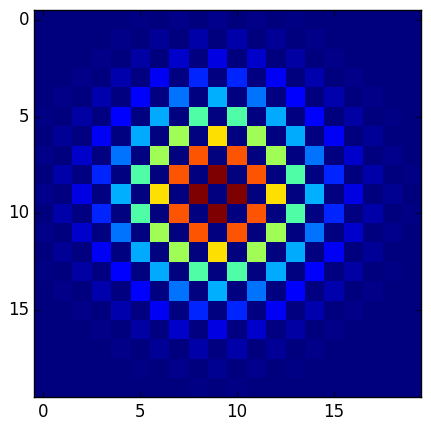

In [5]:
anima(edos, "prueba")

In [6]:
muestra_animacion("prueba")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAA0pltZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0NCByMjUzMyBjOGE3NzNlIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAgXZYiEABL//vet34FNwEDta7pXOLTLq5Q0PVH2lKZ4tkgAAAMAAAMAsBteBnzlzDhaCAAAlwAGIcv9Dz9cs8QBygMfuKY8QztfuD9pmFP9044M5NyOwC+HEo3eQHhzkBP7A5ve/FZBqaJ5FfNQk/FKWSAgGo6bFt8eBMyMbn/AqK9XI2i6dDxZE7OUO0ttx1c+i7v9AhciNAn3X9NXj5nfwqJ1gzxddFc9ArfFIFhZrvGCe60rEIDH5XzctSGqUfk0d+FSnc8zqn9nmHyj0FjWTbRcj010XmLAAxdvmDvfT3NHJubKM+N0eq/m5g0N+s/Ygxz071dUKsuCyDjLE3NwqsG6Y8Mhom6rMW1WM4/ffipeZvfeXRaw1ZLitkslPVo7hTUN0mF6aNAkGGcb0FRNF6VlVqJmuWB/oHpYvDttfzEyeSmO474kaQZP3V8NLr52eEu4F0i765mC34+oVl38ki9ZLFcoYIERvsz2e/r7+qRmxmAAABr/glIolH83G/ZE2Z8dC5IPfAIHUk5eAxDkqzMzGy0Pg29zUSU/lv4sM5qTyhVJPrAY39qiyEyvXegE0Dz7lbwTYXxCZw26meM0w8NBf/CirhpDyDmZQyTFtuCbmSDIoyt/Z3h0CnFt7+YMS7D1gy3JwL3Ok4alRZXhp0YxsmqKujFOPe1wmUwkPiI/b+49kzlNX7xWa7cP1V6tDuI6Bh5oD8NvWpYtQjcBJjFcX+yrAMER868o/0vtZHlVACqlpHbxqPE6nkRuMU6BNUgJT8CeeJLHhWFov4/6QAxk+62srLPm3ooY54rXEPKGdv2y6+XuuS6FFEyVVf5wQ+lkmrJOMhvle3ZJTmo3GxktHiBRwSGnq3LjKug79AJGiSp5Mu/go6d89Qz4Awqvmy55q+ccSfC3vQzWBZ0tWlujAoyPWbOn6RsXZcHFCRq7+gqN7JKZMvkGtpGQ/voMb87XdLXkFbCWOqmoGeka1JcW2KHjzRrSO+hx5lYNP6KvakhAzW3QqizHX9NyAwyYgGEPUy6L4j6ZuUxSUbqK/auW2ybVetjZioybzRPNZi7hfcaZZtMHUo0y0X7fRLQmOQ6anxAYNDF0YQ5lpr0rDmCkIuxz/R8x1Z99BEiXnF1rb3c2fLWN4FC2f72ENx5CsK1vv+TYjjCNSnTTG62x8vB6mhRpzs0hxZ2QwIrRfk3AgFlLhxJcuAEhCHATosR/QsusTj3RM93HrUyMyoAFWYXzEVmtQc0EAa6hyLTnwEqnsAtnyxPudz/GVNGjOKTLqs54gUAuPkrLQI/8pHztCMlmbYFKsKGJiPAbL2RKniIIWAO5JWL2YSb8nkQccGoe6YdsEPm1+5v2wqKUq+z3fmTcvDrID+tsysIdMlL55PuapGWGPA7LNFF6DHDiKPWezJfVCrpCMhQCntYO1g/2TC++xhSDMF35E+v4/NiRh8sVN/YoOwWCz3jEjOJw5RH80T7K047sEpH7OuHIrKTeXsGyKpX8tTxs/OR+6Kjf6YOpD05gC4Ruo9M+KjwPoLbv0RP23Ly4jb1yOSuJ1EaH6ZuKm8AI8vfjmjjYF/j9MVfi+wOuTjSmni1qnK6rLoY6zOkWwqFIrD94g/E9GhLIMfM65hLvWD5m+ptc3//Hu5Q1+CcmnIQhc50unH70McZOpCNJkDHkO9L5Q6O7wYVTU6VtsXWFIH/roq7NMFvfKTahfKZ5WP3aI2DYfV6eA1pvGdx4rHzqpnjzGhiommT2m0oNcIln5ltWxsr+8dzpdfZVAVE6O/f93kAEf3O9Ik+sNzVvNgRDrc5Y0lj4+OOvPRV8IWEpTqf+eUPRWeMAI7i6d1OD/JI6CWoiYB00B1hJUdDBhDmE6fnS2VXIkEHXPew/+7Zrj3GRznLvnsldb/YXYIRP7vt3o7HkpJYmmeArd4WDxiVI6DCq76zOaQD8U/H3JyRZNaMjj+234VOqpumqMrxXF3hXzxDvWCnWX2fpS1b7OQZ1rkJ0UYJROybImOEhzslB01D6Ae2ivbwfgH6fIRRXjF3sq1TUX90X/ehuw9vupe6VsHctWYQcpfPaOdpExRoaMTDfKYmwo6l1sKEP5O8xh3/pnNqIZ5KG9e7BnRTc0MdqXaFM5jTK+COiJzWrm28Xd2aRX/h4RIVWafNx5W/DkSs5cG9oKv7kRYYZGv8ghpm+Q3xnArYl9Bhr1GXR7LTghBVOZM9d+J8X8OZRNCQcjIYPy00fLShfW3YaYi4h7dmB7+6/nwK0+MPvsR6DrAbigufx7469+O49TO2or0EhqvZcC2J+/Ogg7qhypW0SH+WWC7NlUiXhCkiF1Eycnbvk68pK2odBhtSE22yFRa+IgzVxX3fv0GnYEhHgW1N4uv6eNsbue7mpKNTGkXoJ84dKkpP4rCxDw9Mh+rhGzDrc3T7Fnm0XEmO3NgkcJ3pxGFLGgxUur0BSu9jMckq8YmUkGmjup5B4SlnYpWg0H5BwA3C69AdYoqH6LN3751uqffK5E25r2X1TEGI0lZrindXC361jPensuSonunemz7f1c10bgAqRag0ut9CUKP9c1nUgWTkiRZNtkq1jl6lCcP/wGpCpmUxTEeQmNBAE4cxcL/vHjGSISc5hXCSizqa1W/3EdzEqCo5+FyxXHw9gfY92JrZ4xdgKrrfvNx5FqR1BWF1v2zfpcwTxqyoWKQR3MEDBZlLlS9bAUL/zy9vyh0F+qHMuXSnZO/2oXn+1GuSqqoVFYhr0oZAsGvs40EeygAACAwAAAW5BmiFsQT/+tSqABvMx8AATskr/RcHB2wvM6qVP/ja0tWdjavmjwD8VtnzmgoS5G6K+pzKyD5rh7nebkha0SB/4REoRVLxRaYuRYpfC6DA2iEmsn6u4v8R2TMUwtJo/vireD1C0Qb4F0KZsALpgRFa8s2ihyJSM4evtEPa94TYi2bllFjWMOQTcmHV9tAlVckmECBoBPIsBZRWfKgx